In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.



# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#000000;overflow:hidden">CNN</div>

In [3]:
input_shape = (224, 224, 3)  

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

Epoch 1/10


I0000 00:00:1715157721.334109     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 [==============================] - 33s 2s/step - loss: 0.7913 - accuracy: 0.5560 - val_loss: 0.5460 - val_accuracy: 0.8347
Epoch 2/10
16/16 [==============================] - 18s 1s/step - loss: 0.4876 - accuracy: 0.7760 - val_loss: 0.5489 - val_accuracy: 0.7025
Epoch 3/10
16/16 [==============================] - 18s 1s/step - loss: 0.3818 - accuracy: 0.8534 - val_loss: 0.3492 - val_accuracy: 0.8678
Epoch 4/10
16/16 [==============================] - 18s 1s/step - loss: 0.3245 - accuracy: 0.8615 - val_loss: 0.4384 - val_accuracy: 0.8678
Epoch 5/10
16/16 [==============================] - 18s 1s/step - loss: 0.2793 - accuracy: 0.8859 - val_loss: 0.3590 - val_accuracy: 0.8678
Epoch 6/10
16/16 [==============================] - 18s 1s/step - loss: 0.1995 - accuracy: 0.9287 - val_loss: 0.3283 - val_accuracy: 0.9174
Epoch 7/10
16/16 [==============================] - 18s 1s/step - loss: 0.1718 - accuracy: 0.9246 - val_loss: 0.3478 - val_accuracy: 0.9091
Epoch 8/10
16/16 [=============

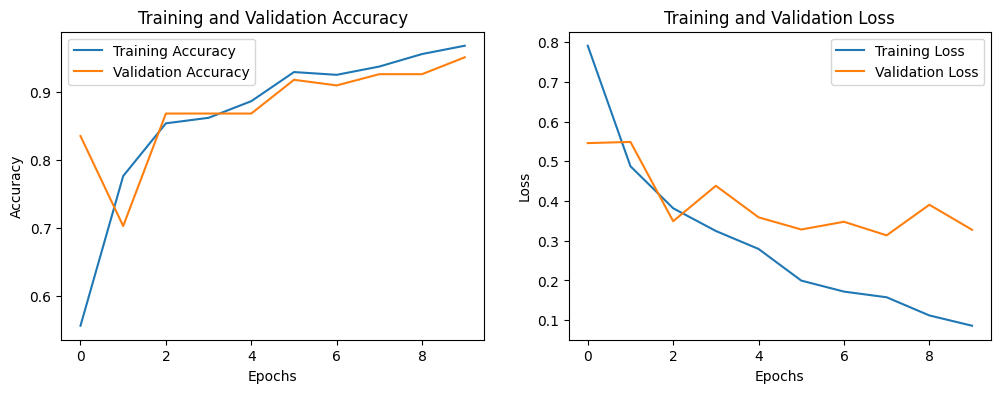

4/4 [==============================] - 4s 1s/step - loss: 0.3276 - accuracy: 0.9504
Test Accuracy: 95.04%


In [4]:

history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [10]:
model.save('/kaggle/working/cataract.kera')